<a href="https://colab.research.google.com/github/salmaelgd/land_use_change_image_classification/blob/main/land_use_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import os

In [19]:
#data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, # rotate the image by up to 20 degrees
    horizontal_flip=True, # flip the image horizontally
    vertical_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/land_use_change/train',
    target_size=(128, 128),
    batch_size=7000,
    class_mode='categorical'
)


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/land_use_change/test',
    target_size=(128, 128),
    batch_size= 1400,
    class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [20]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

train_images shape:  (7000, 128, 128, 3)
train_labels shape:  (7000, 10)
test_images shape:  (1400, 128, 128, 3)
test_labels shape:  (1400, 10)


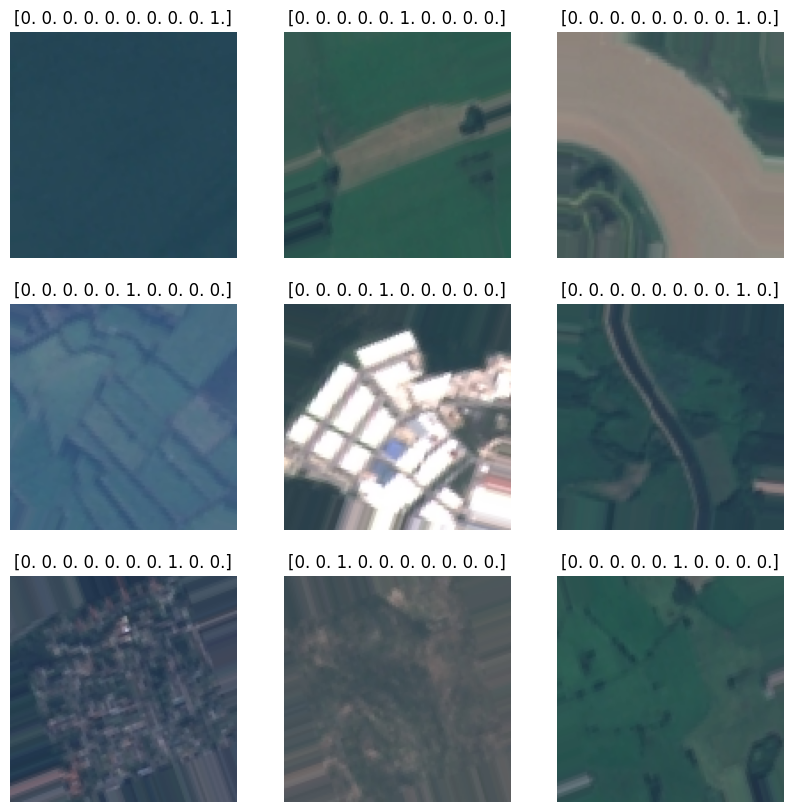

In [21]:
print("train_images shape: ", X_train.shape)
print("train_labels shape: ", y_train.shape)
print("test_images shape: ", X_test.shape)
print("test_labels shape: ", y_test.shape)
fig = plt.figure(figsize=(10,10))

nrows=3
ncols=3
for i in range(9):
  fig.add_subplot(nrows, ncols, i+1)
  plt.imshow(X_train[i])
  plt.title("{}".format(y_train[i]))
  plt.axis(False)
plt.show()

In [22]:
train_generator.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [23]:
#model creation
from tensorflow.keras import layers
model=Sequential()

layers.Dropout(0.3)
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(128,128,3)))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
layers.Dropout(0.3)
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation ="relu"))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
layers.Dropout(0.3)
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
layers.Dropout(0.3)
model.add(Conv2D(filters=512,kernel_size=2,padding="same",activation="relu"))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
layers.Dropout(0.3)
model.add(Dense(500,activation="relu"))
layers.BatchNormalization()
layers.Dropout(0.3)
model.add(Dense(32,activation="relu"))
layers.BatchNormalization()
layers.Dropout(0.3)
model.add(Dense(10,activation="softmax"))



In [24]:
from keras import metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1_score
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy', metrics.Precision(), metrics.Recall(), f1_score])

In [26]:
history=model.fit(
          X_train,
          y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
55/55 [==============================] - 281s 5s/step - loss: 0.9388 - accuracy: 0.6589 - precision_1: 0.7632 - recall_1: 0.5290 - f1_score: 0.6245
Epoch 2/20
55/55 [==============================] - 279s 5s/step - loss: 0.7934 - accuracy: 0.7141 - precision_1: 0.7967 - recall_1: 0.6140 - f1_score: 0.6930
Epoch 3/20
55/55 [==============================] - 280s 5s/step - loss: 0.7480 - accuracy: 0.7253 - precision_1: 0.8012 - recall_1: 0.6363 - f1_score: 0.7090
Epoch 4/20
55/55 [==============================] - 279s 5s/step - loss: 0.6275 - accuracy: 0.7724 - precision_1: 0.8351 - recall_1: 0.7011 - f1_score: 0.7621
Epoch 5/20
55/55 [==============================] - 281s 5s/step - loss: 0.6133 - accuracy: 0.7846 - precision_1: 0.8411 - recall_1: 0.7190 - f1_score: 0.7752
Epoch 6/20
55/55 [==============================] - 279s 5s/step - loss: 0.5323 - accuracy: 0.8079 - precision_1: 0.8571 - recall_1: 0.7539 - f1_score: 0.8015
Epoch 7/20
55/55 [============================

In [27]:
# Évaluation du modèle sur les données de test
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

44/44 [==============================] - 15s 338ms/step - loss: 0.8643 - accuracy: 0.7686 - precision_1: 0.7838 - recall_1: 0.7586 - f1_score: 0.7713
Loss: 0.8642777800559998
Accuracy: 0.7685714364051819
Precision: 0.7837638258934021
Recall: 0.758571445941925
F1 Score: 0.7713024020195007


44/44 [==============================] - 15s 349ms/step


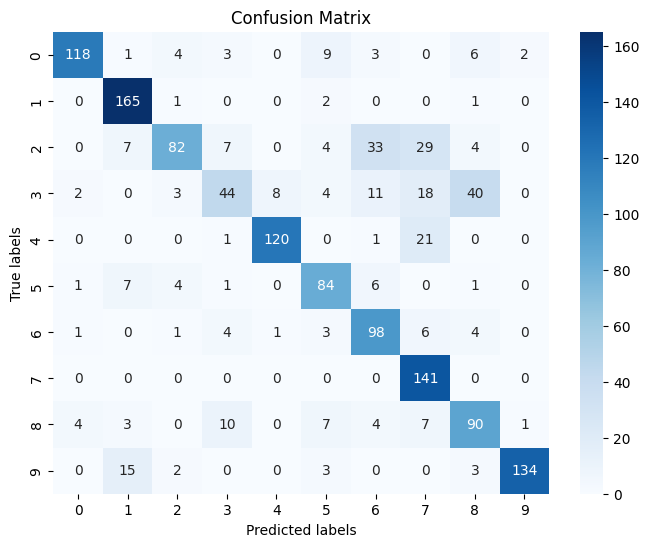

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir les prédictions du modèle sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# Obtenir le rapport de classification
class_report = classification_report(y_test_binary, y_pred_binary)
print("Rapport de Classification:")
print(class_report)

Rapport de Classification:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       235
           1       0.92      0.85      0.88       215
           2       0.69      0.72      0.71       227
           3       0.58      0.34      0.43       185
           4       0.90      0.85      0.87       184
           5       0.78      0.78      0.78       152
           6       0.56      0.68      0.61       182
           7       0.78      1.00      0.88       229
           8       0.71      0.69      0.70       177
           9       0.87      0.94      0.91       214

    accuracy                           0.77      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.77      0.77      2000



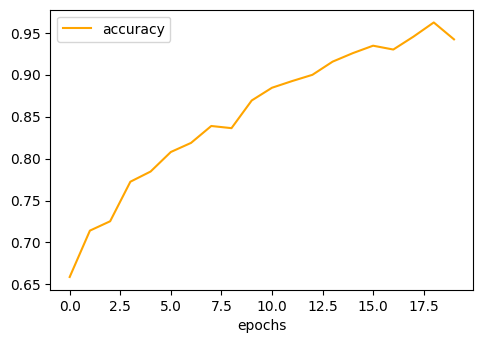

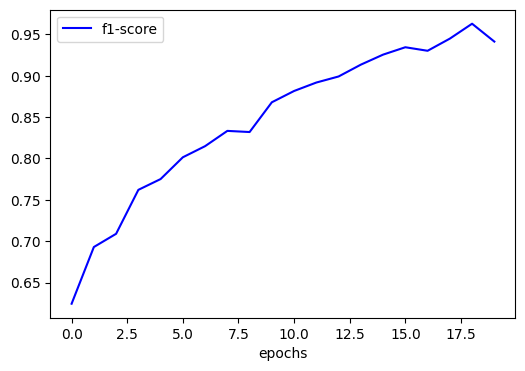

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])

plt.figure(figsize=(6, 4))

plt.plot(history.history['f1_score'], color='blue')
plt.xlabel('epochs')
plt.legend(['f1-score'])

plt.show()